In [11]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train_single = pd.read_csv('../data/raw/lcp_single_train.tsv', sep='\t')

In [5]:
train_multi = pd.read_csv('../data/raw/lcp_multi_train.tsv', sep='\t')

In [7]:
train_single.shape, train_multi.shape

((7232, 5), (1464, 5))

In [8]:
train_single.head(3)

,id,corpus,sentence,token,complexity
0,3ZLW647WALVGE8EBR50EGUBPU4P32A,bible,"Behold, there came up out of the river seven c...",river,0.00
1,34R0BODSP1ZBN3DVY8J8XSIY551E5C,bible,I am a fellow bondservant with you and with yo...,brothers,0.00
2,3S1WOPCJFGTJU2SGNAN2Y213N6WJE3,bible,"The man, the lord of the land, said to us, 'By...",brothers,0.05


# Analysis

In [30]:
train_single[['complexity']].mean(), train_single[['complexity']].std()

(complexity    0.301485
 dtype: float64, complexity    0.133091
 dtype: float64)

In [31]:
train_multi[['complexity']].mean(), train_multi[['complexity']].std()

(complexity    0.41922
 dtype: float64, complexity    0.157103
 dtype: float64)

- In general, Multi have more mean complexity and std than Single

In [34]:
train_single.groupby('corpus').agg({'complexity': ['mean', 'std']})

complexity          
               mean       std
corpus                       
bible      0.290956  0.131206
biomed     0.324377  0.151944
europarl   0.286996  0.108626

In [35]:
train_multi.groupby('corpus').agg({'complexity': ['mean', 'std']})

complexity          
               mean       std
corpus                       
bible      0.375036  0.150999
biomed     0.493693  0.171375
europarl   0.382457  0.113062

- In each corpus, Multi have more mean complexity and std than Single

In [20]:
temp_train = train_single.groupby('token').agg({'complexity': ['count', 'mean', 'std', 'median', 'max', 'min']}).reset_index()
temp_train.columns = ['_'.join(col).strip('_') for col in temp_train.columns]

In [21]:
temp_train.sort_values(by='complexity_count')

,token,complexity_count,complexity_mean,complexity_std,complexity_median,complexity_max,complexity_min
1663,finger,1,0.050000,NaN,0.050000,0.050000,0.050000
1580,exit,1,0.216667,NaN,0.216667,0.216667,0.216667
1578,exertion,1,0.321429,NaN,0.321429,0.321429,0.321429
1576,exemptions,1,0.265625,NaN,0.265625,0.265625,0.265625
1575,execution,1,0.250000,NaN,0.250000,0.250000,0.250000
...,...,...,...,...,...,...,...
243,European,6,0.180345,0.053248,0.174370,0.250000,0.125000
442,Macedonia,6,0.405812,0.062078,0.425735,0.468750,0.316667
488,Mr,7,0.181991,0.066407,0.178571,0.276316,0.075000
535,Parliament,7,0.287339,0.065214,0.305556,0.347826,0.150000


In [37]:
temp_train.groupby('complexity_count').agg({'complexity_mean': ['count', 'mean'],
                                           'complexity_std': ['count', 'mean']})

complexity_mean           complexity_std          
                           count      mean          count      mean
complexity_count                                                   
1                           1704  0.323023              0       NaN
2                            578  0.310819            578  0.054978
3                            338  0.290813            338  0.061015
4                            207  0.297613            207  0.061420
5                            485  0.288763            485  0.064828
6                             13  0.271687             13  0.075082
7                              2  0.234665              2  0.065810
10                             1  0.365420              1  0.055241

In [39]:
temp_train.groupby(['complexity_count']).agg({'complexity_mean': ['count', 'mean'],
                                           'complexity_std': ['mean', 'std']})

complexity_mean           complexity_std          
                           count      mean           mean       std
complexity_count                                                   
1                           1704  0.323023            NaN       NaN
2                            578  0.310819       0.054978  0.043677
3                            338  0.290813       0.061015  0.031526
4                            207  0.297613       0.061420  0.029681
5                            485  0.288763       0.064828  0.025963
6                             13  0.271687       0.075082  0.033574
7                              2  0.234665       0.065810  0.000843
10                             1  0.365420       0.055241       NaN

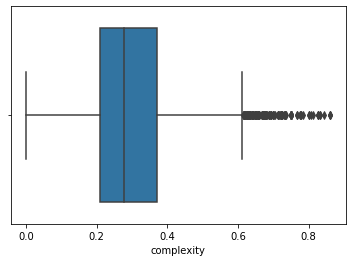

In [12]:
sns.boxplot(train_single.complexity)